<a href="https://colab.research.google.com/github/Li-DavidM/Li-DavidM/blob/main/Classification_of_unza_faculty_research_interests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Business Understanding
##Problem Statement
The University of Zambia (UNZA) produces numerous research publications annually across diverse faculties. However, these publications are not systematically classified according to Zambia’s Vision 2030 sector categories, making it challenging for policymakers, funding bodies, and administrators to assess how research aligns with national development priorities. Manual classification is time-consuming, inconsistent, and inefficient. There is a need for an automated system to classify research outputs into Vision 2030 sectors using only publication titles.

##Business Objectives
The objective is to:
* Automate the classification of UNZA faculty research publications into Vision 2030 sector categories.
* Improve accessibility and searchability of research outputs by sector.
* Enable faster and more consistent reporting for stakeholders.

Success in real-world terms means stakeholders can easily retrieve research outputs relevant to specific Vision 2030 sectors making the classification process faster, more consistent, and requires minimal

##Data Mining Goals
* We will collect, understand the data of UNZA faculty member’s publications
* We prepare the training and testing data which includes include cleaning, transforming, integrating, and formatting data for modeling.
* We will build a supervised machine learning classification model that:
 * Takes a publication title as input.
 *	Predicts the most likely Vision 2030 sector category (e.g., Agriculture, Energy, Health, Education, etc.).
 * Is trained and evaluated using labeled publication title data from UNZA faculty research.
* We will assesses the quality and effectiveness of the model ensuring the results achieve the business objectives

##Initial Project Success Criteria
* **Model Performance**: The classification model should achieve at least 80% accuracy on unseen test data.
* **Usability**: The system should output results in a clear and interpretable format for non-technical users.
* **Practical Value**: The automated classification should reduce the manual categorization time by at least 50% compared to the current process.





# Data Understanding

In [ ]:
import pandas as pd

In [ ]:
#Mounting to the drive so that created files are saved
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Navigating to the shared team project folder
#instructions: ensure you have created a shortcut of the shared folder in the drive
#root directory
%cd "/content/drive/My Drive/misc-unza25-csc4792-project_team21"

/content/drive/.shortcut-targets-by-id/1rE8kSkQXl-SiU24RkWcyCi02p-dW0Y-1/misc-unza25-csc4792-project_team21


In [ ]:
!ls

Classification_of_unza_faculty_research_interests.ipynb
unza_faculty_publications_details.csv


In [ ]:
pub_details = pd.read_csv('unza_faculty_publications_details.csv')

In [ ]:
pub_details.head()

,title,authors,year,venue,abstract,num_citations,url_scholarbib
0,Zambezi voice: A multilingual speech corpus fo...,"C Sikasote, K Siaminwe, S Mwape, B Zulu",2023.0,arXiv preprint arXiv …,for all the seven official native languages of...,5,https://arxiv.org/abs/2306.04428
1,BembaSpeech: A speech recognition corpus for t...,"C Sikasote, A Anastasopoulos",2021.0,arXiv preprint arXiv:2102.04889,impendwa ya bantu ba mu Zambia ukufika cipendo...,20,https://arxiv.org/abs/2102.04889
2,Big-c: a multimodal multi-purpose dataset for ...,"C Sikasote, E Mukonde, MMI Alam",2023.0,arXiv preprint arXiv …,We present BIG-C (Bemba Image Grounded Convers...,6,https://arxiv.org/abs/2305.17202
3,Evaluating DICOM Compliance for Medical Images...,"E Chileshe, MC Sikasote, L Phiri",NaN,NaN,This paper focuses on a detailed examination o...,0,https://datalab.unza.zm/sites/default/files/20...
4,Implementation of the Sustainable Development ...,"J Lubbungu, C Pailet, K Shameenda",NaN,… OF PUBLIC UNIVERSITIES …,"of entrepreneurial universities in the world, ...",0,https://www.zapuc.edu.zm/docs/2018_ZAPUC_Confe...


In [ ]:
pub_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           116 non-null    object 
 1   authors         116 non-null    object 
 2   year            97 non-null     float64
 3   venue           80 non-null     object 
 4   abstract        116 non-null    object 
 5   num_citations   116 non-null    int64  
 6   url_scholarbib  116 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.5+ KB


In [ ]:
pub_details.describe()

,year,num_citations
count,97.000000,116.000000
mean,2020.216495,7.025862
std,5.105607,26.317943
min,2000.000000,0.000000
25%,2019.000000,0.000000
50%,2022.000000,1.000000
75%,2023.000000,4.000000
max,2025.000000,229.000000


In [ ]:
pub_details.shape

(116, 7)

In [ ]:
pub_details.columns

Index(['title', 'authors', 'year', 'venue', 'abstract', 'num_citations',
       'url_scholarbib'],
      dtype='object')

In [ ]:
pub_details.dtypes

,0
title,object
authors,object
year,float64
venue,object
abstract,object
num_citations,int64
url_scholarbib,object


In [ ]:
pub_details.duplicated().sum()

np.int64(2)

In [ ]:
pub_details['year'].unique()        # Distinct years
pub_details['venue'].value_counts() # Top publication venues
pub_details['authors'].str.split(',').explode().value_counts() # Author frequency

,count
authors,
J Phiri,46
M Nyirenda,25
,10
C Sikasote,5
J Phiri,5
...,...
B Namangala,1
R Silhavy,1
P Silhavy,1


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

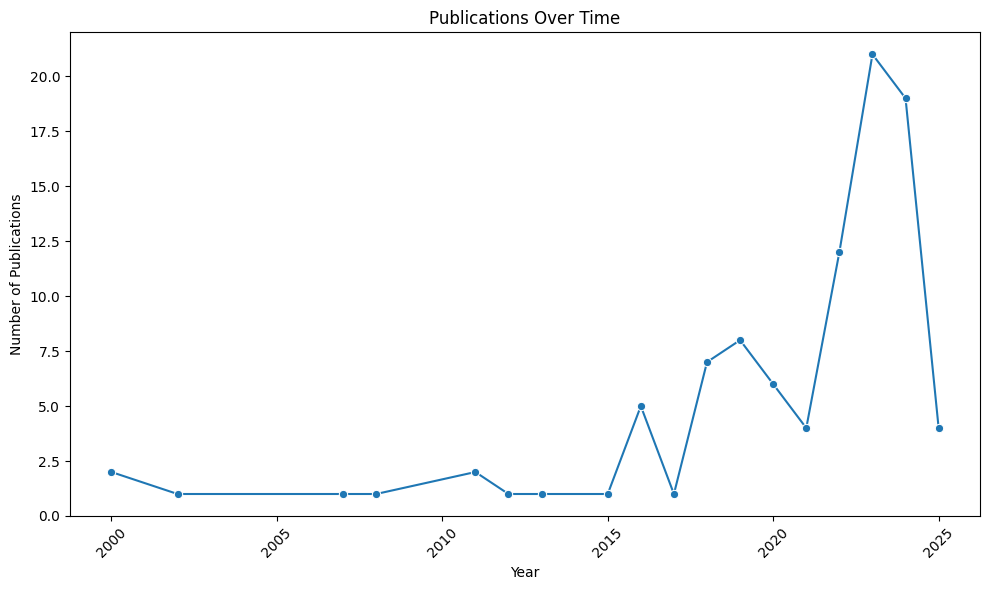

In [ ]:
# Group by year
pubs_per_year = pub_details.groupby("year").size().reset_index(name="num_publications")

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=pubs_per_year, x="year", y="num_publications", marker='o')
plt.title("Publications Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter

/tmp/ipython-input-3066780015.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_authors, x='num_publications', y='author', palette='viridis')


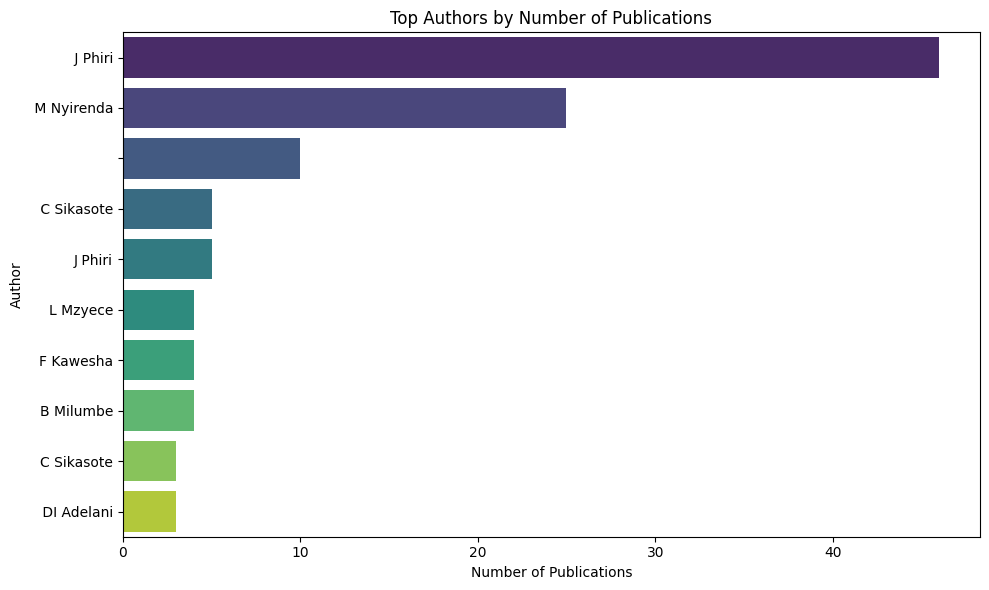

In [ ]:
# Split authors
authors_list = pub_details['authors'].dropna().str.split(',').sum()
author_counts = Counter(authors_list)
top_authors = pd.DataFrame(author_counts.most_common(10), columns=['author','num_publications'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_authors, x='num_publications', y='author', palette='viridis')
plt.title("Top Authors by Number of Publications")
plt.xlabel("Number of Publications")
plt.ylabel("Author")
plt.tight_layout()
plt.show()


/tmp/ipython-input-862378641.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cited_authors, x='num_citations', y='author', palette='magma')


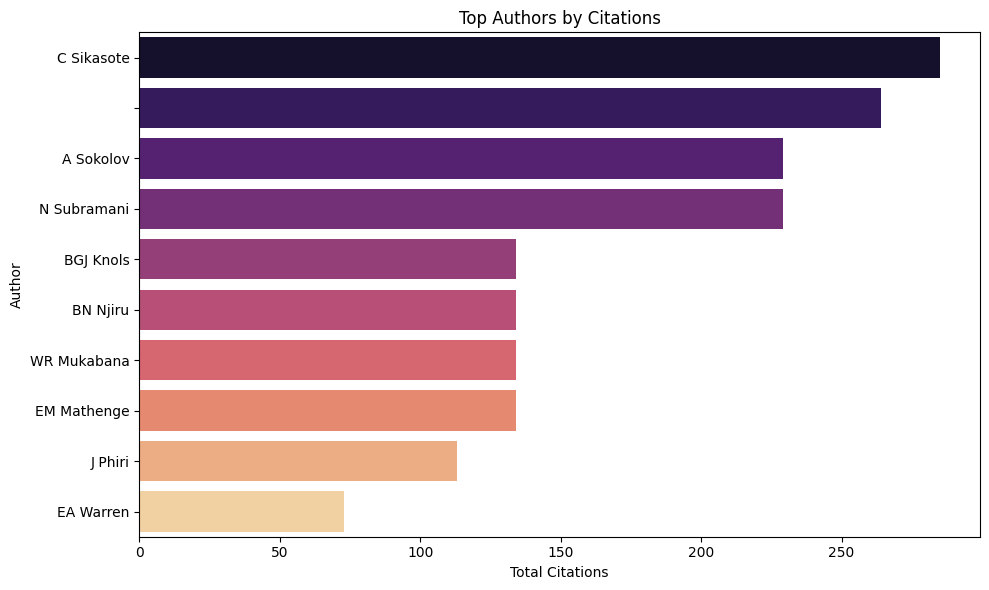

In [ ]:
# Aggregate citations per author
df_authors_citations = pub_details.dropna(subset=['authors', 'num_citations'])
df_authors_citations['num_citations'] = df_authors_citations['num_citations'].astype(int)

author_cit_list = []
for i, row in df_authors_citations.iterrows():
    authors = row['authors'].split(',')
    for author in authors:
        author_cit_list.append((author.strip(), row['num_citations']))

author_cit_df = pd.DataFrame(author_cit_list, columns=['author', 'num_citations'])
top_cited_authors = author_cit_df.groupby('author')['num_citations'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=top_cited_authors, x='num_citations', y='author', palette='magma')
plt.title("Top Authors by Citations")
plt.xlabel("Total Citations")
plt.ylabel("Author")
plt.tight_layout()
plt.show()


**Written Summary of Findings **

The dataset on UNZA faculty publications contains records of 116 publications with the
following columns: title, authors, year, venue, abstract, num_citations, and url_scholarbib.
The data types are mostly strings (object) with year and num_citations stored as numeric
values. From the info() check, we see that some entries have missing values in year and
venue, while others contain empty author fields. A shape check confirms that there are 116
rows and 7 columns, and a duplicate check shows that there are no exact duplicate rows.
Descriptive statistics reveal that the number of citations per paper ranges from 0 to 229, with
an average of about 7 citations, though the distribution is highly skewed—most papers have
fewer than 5 citations.

Looking at publication trends over time, the dataset spans from 2000 to 2025, but research
activity was minimal before 2015, with only one or two papers published in some years. The
trend changed significantly after 2016, showing steady growth. The most productive years
were 2023 with 21 publications and 2024 with 19 publications, marking the peak of
research activity in the dataset. This indicates that faculty research output has grown
substantially in the last decade, suggesting stronger academic engagement and improved
research culture.

When analyzing author productivity, a small group of researchers contributes the majority of
publications. J Phiri leads with 51 publications, followed by M Nyirenda with 25, and then
C Sikasote with 8 and L Mzyece with 7. This demonstrates that research output is
concentrated among a few prolific authors, highlighting strong individual leadership in
research but also suggesting that overall faculty contributions may be unevenly distributed.

In terms of research impact measured by citations, C Sikasote emerges as the most
influential author with 285 citations, despite having fewer publications than J Phiri.
International collaborators such as A Sokolov and N Subramani also stand out, each with
229 citations, while BGJ Knols contributes significantly with 134 citations. This shows that
collaborative and high-quality research is yielding greater academic visibility, and that
impact is not strictly tied to the number of papers produced but also to their relevance and
recognition within the academic community.